epochs: 0 loss: 0.21762396744801293
epochs: 5000 loss: 0.11732555950357146
epochs: 10000 loss: 0.0688982618381862
epochs: 15000 loss: 0.018655013190406324
epochs: 20000 loss: 0.006822680094657328
epochs: 25000 loss: 0.0036293653738693264
epochs: 30000 loss: 0.0023404682423801768
epochs: 35000 loss: 0.0016812981556789796
epochs: 40000 loss: 0.0012918838096209321
epochs: 45000 loss: 0.0010388512054637757
epochs: 50000 loss: 0.0008630411815966008
epochs: 55000 loss: 0.0007346862690220364
epochs: 60000 loss: 0.0006373505119877871
epochs: 65000 loss: 0.0005612901383136857
epochs: 70000 loss: 0.000500395263445126
epochs: 75000 loss: 0.00045065672981320213
epochs: 80000 loss: 0.00040934342664640977
epochs: 85000 loss: 0.00037453549172522115
epochs: 90000 loss: 0.0003448467860127621
epochs: 95000 loss: 0.0003192532302786934
epochs: 100000 loss: 0.0002969829474679181


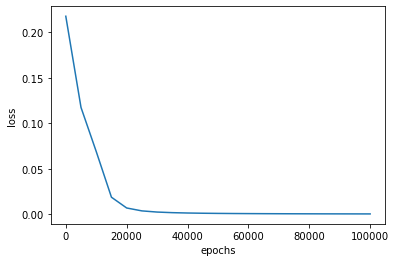

output:
[[0.02584595]
 [0.97675693]
 [0.97639247]
 [0.02470414]]
predict:
0
1
1
0


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
 
# 输入数据 
X = np.array([[0,0], 
              [0,1], 
              [1,0], 
              [1,1]]) 
# 标签 
T = np.array([[0], 
              [1], 
              [1], 
              [0]]) 
# 定义一个 2 层的神经网络：2-10-1 
# 输入层 2 个神经元，隐藏层 10 个神经元，输出层 1 个神经元 
# 输入层到隐藏层的权值初始化，2 行 10 列 
W1 = np.random.random([2,10]) 
# 隐藏层到输出层的权值初始化，10 行 1 列 
W2 = np.random.random([10,1]) 
# 初始化偏置值，偏置值的初始化一般可以取 0，或者一个比较小的常数，如 0.1 
# 隐藏层的 10 个神经元偏置 
b1 = np.zeros([10]) 
# 输出层的 1 个神经元偏置 
b2 = np.zeros([1]) 
# 学习率设置 
lr = 0.1 
# 定义训练周期数 
epochs = 100001 
# 定义测试周期数 
test = 5000 
 
# 定义 sigmoid 函数 
def sigmoid(x): 
    return 1/(1+np.exp(-x)) 
 
# 定义 sigmoid 函数导数 
def dsigmoid(x): 
    return x*(1-x) 
 
# 更新权值和偏置值 
def update(): 
    global X,T,W1,W2,lr,b1,b2 
     
    # 隐藏层输出 
    L1 = sigmoid(np.dot(X,W1) + b1) 
    # 输出层输出 
    L2 = sigmoid(np.dot(L1,W2) + b2) 
     
    # 求输出层的学习信号 
    delta_L2 = (T - L2) * dsigmoid(L2) 
    # 隐藏层的学习信号 
    delta_L1 = delta_L2.dot(W2.T) * dsigmoid(L1) 
     
    # 求隐藏层到输出层的权值改变 
    # 由于一次计算了多个样本，所以需要求平均 
    delta_W2 = lr * L1.T.dot(delta_L2) / X.shape[0] 
    # 输入层到隐藏层的权值改变 
     # 由于一次计算了多个样本，所以需要求平均 
    delta_W1 = lr * X.T.dot(delta_L1) / X.shape[0] 
     
    # 更新权值 
    W2 = W2 + delta_W2 
    W1 = W1 + delta_W1 
     
    # 改变偏置值 
    # 由于一次计算了多个样本，所以需要求平均 
    b2 = b2 + lr * np.mean(delta_L2, axis=0) 
    b1 = b1 + lr * np.mean(delta_L1, axis=0)  
# 定义空 list 用于保存 loss 
loss = [] 
# 训练模型 
for i in range(epochs): 
    # 更新权值 
    update() 
    # 每训练 5000 次计算一次 loss 值 
    if i % test == 0: 
        # 隐藏层输出 
        L1 = sigmoid(np.dot(X,W1) + b1) 
        # 输出层输出 
        L2 = sigmoid(np.dot(L1,W2) + b2) 
        # 计算 loss 值 
        print('epochs:',i,'loss:',np.mean(np.square(T - L2) / 2)) 
        # 保存 loss 值 
        loss.append(np.mean(np.square(T - L2) / 2)) 

# 画图训练周期数与 loss 的关系图 
plt.plot(range(0,epochs,test),loss) 
plt.xlabel('epochs') 
plt.ylabel('loss') 
plt.show() 
         
# 隐藏层输出 
L1 = sigmoid(np.dot(X,W1) + b1) 
# 输出层输出 
L2 = sigmoid(np.dot(L1,W2) + b2) 
print('output:') 
print(L2) 
 
# 因为最终的分类只有 0 和 1，所以我们可以把 
# 大于等于 0.5 的值归为 1 类，小于 0.5 的值归为 0 类
def predict(x): 
    if x>=0.5: 
        return 1 
    else: 
        return 0 
# map 会根据提供的函数对指定序列做映射 
# 相当于依次把 L2 中的值放到 predict 函数中计算 
# 然后打印出结果 
print('predict:') 
for i in map(predict,L2): 
    print(i) 